# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

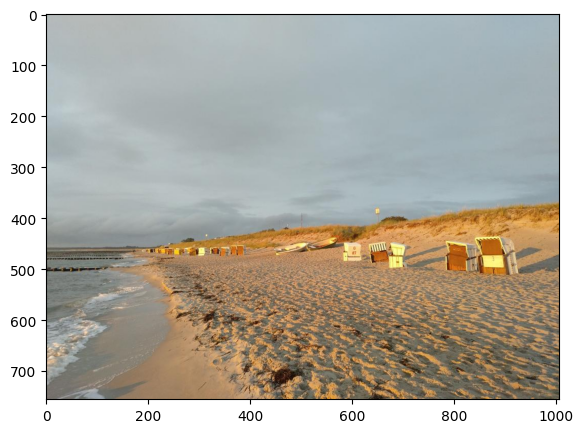

In [2]:
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x1509c24f1d0>)

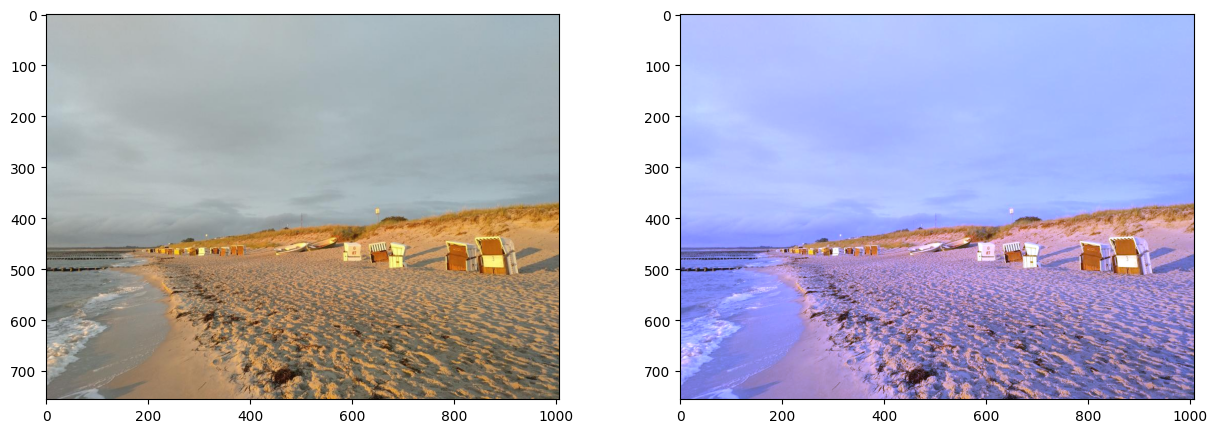

In [4]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x150a27a3dd0>)

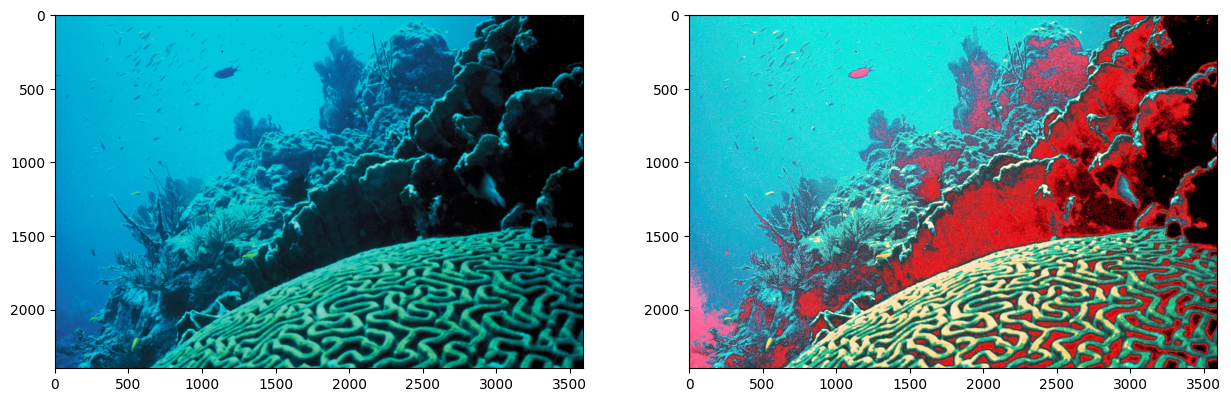

In [22]:
# Load your image
img = cv2.imread('../data/underwater.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
r, g, b = cv2.split(img)
mean_r = np.mean(r)
mean_g = np.mean(g)
mean_b = np.mean(b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

# Selecting the brightest color channel, fix it, and get other coefficients.
means = np.array([mean_r, mean_g, mean_b], dtype=np.float32)
idx_max = np.argmax(means)
coeffs = means[idx_max] / means
coeffs[idx_max] = 1.0
kr, kg, kb = coeffs.tolist()

balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
    
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x150a37abe50>)

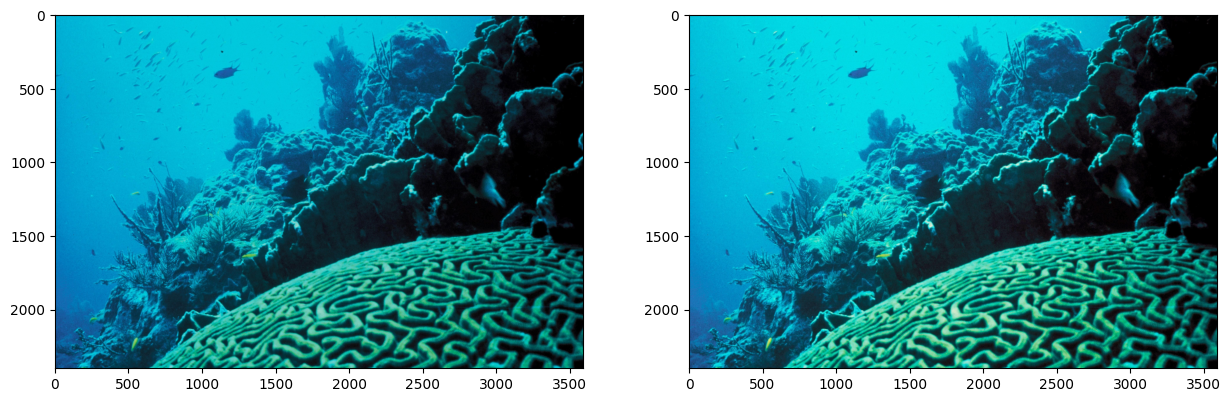

In [23]:
# Load your image
img = cv2.imread('../data/underwater.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
r, g, b = cv2.split(img)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)
coeffs = [255.0 / max_r, 255.0 / max_g, 255.0 / max_b]

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
    
balanced = np.clip(balanced, 0, 255).astype(np.uint8)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)